In [1]:
import pandas as pd
from utils import make_plot, rmse

In [2]:
log_file_path = 'test1.log' #wardi_hover_cpp0.log'
# Reading the .log file into a pandas DataFrame
df_log = pd.read_csv(log_file_path, header=0, dtype={'metadata': str})

# Display the first few rows to confirm successful import
df_log.head()

,time,x,y,z,yaw,throttle,roll_rate,pitch_rate,yaw_rate,x_ref,y_ref,z_ref,yaw_ref,pred_time,nr_time,metadata
0,7.152557e-07,0.007935,-0.005460,-0.038006,-0.002569,-0.709682,0.005092,0.007970,0.000963,0.0,0.0,-0.6,0.0,0.000281,0.000468,Sim
1,9.927511e-03,0.007511,-0.005499,-0.037856,-0.002568,-0.725513,0.011738,0.013695,0.001300,0.0,0.0,-0.6,0.0,0.000132,0.000432,Nonlinear
2,2.008533e-02,0.007305,-0.005519,-0.037786,-0.002562,-0.737935,0.018114,0.017829,0.001753,0.0,0.0,-0.6,0.0,0.000149,0.000503,1stOrderHold
3,2.996778e-02,0.007103,-0.005539,-0.037718,-0.002563,-0.747099,0.023965,0.020910,0.002030,0.0,0.0,-0.6,0.0,0.000125,0.000409,QuatYawError
4,4.003596e-02,0.006906,-0.005560,-0.037655,-0.002563,-0.753720,0.029178,0.022972,0.002285,0.0,0.0,-0.6,0.0,0.000118,0.000429,NoPyJoules


In [3]:
print(f"This data comes from: {df_log['metadata'][0]}")
print(f"Predictor was: {df_log['metadata'][1]}")
print(f"(Valid for Nonlin & Jax predictor only) Predictor was: {df_log['metadata'][2]}")
print(f"For yaw error we used: {df_log['metadata'][3]}")
print(f"Mean computation time: {df_log['nr_time'].mean()}")
print(f"RMSE: {rmse(df_log)}")


This data comes from: Sim
Predictor was: Nonlinear
(Valid for Nonlin & Jax predictor only) Predictor was: 1stOrderHold
For yaw error we used: QuatYawError
Mean computation time: 0.00033119372715112656
RMSE: 0.1368268410739774


# Plot it!

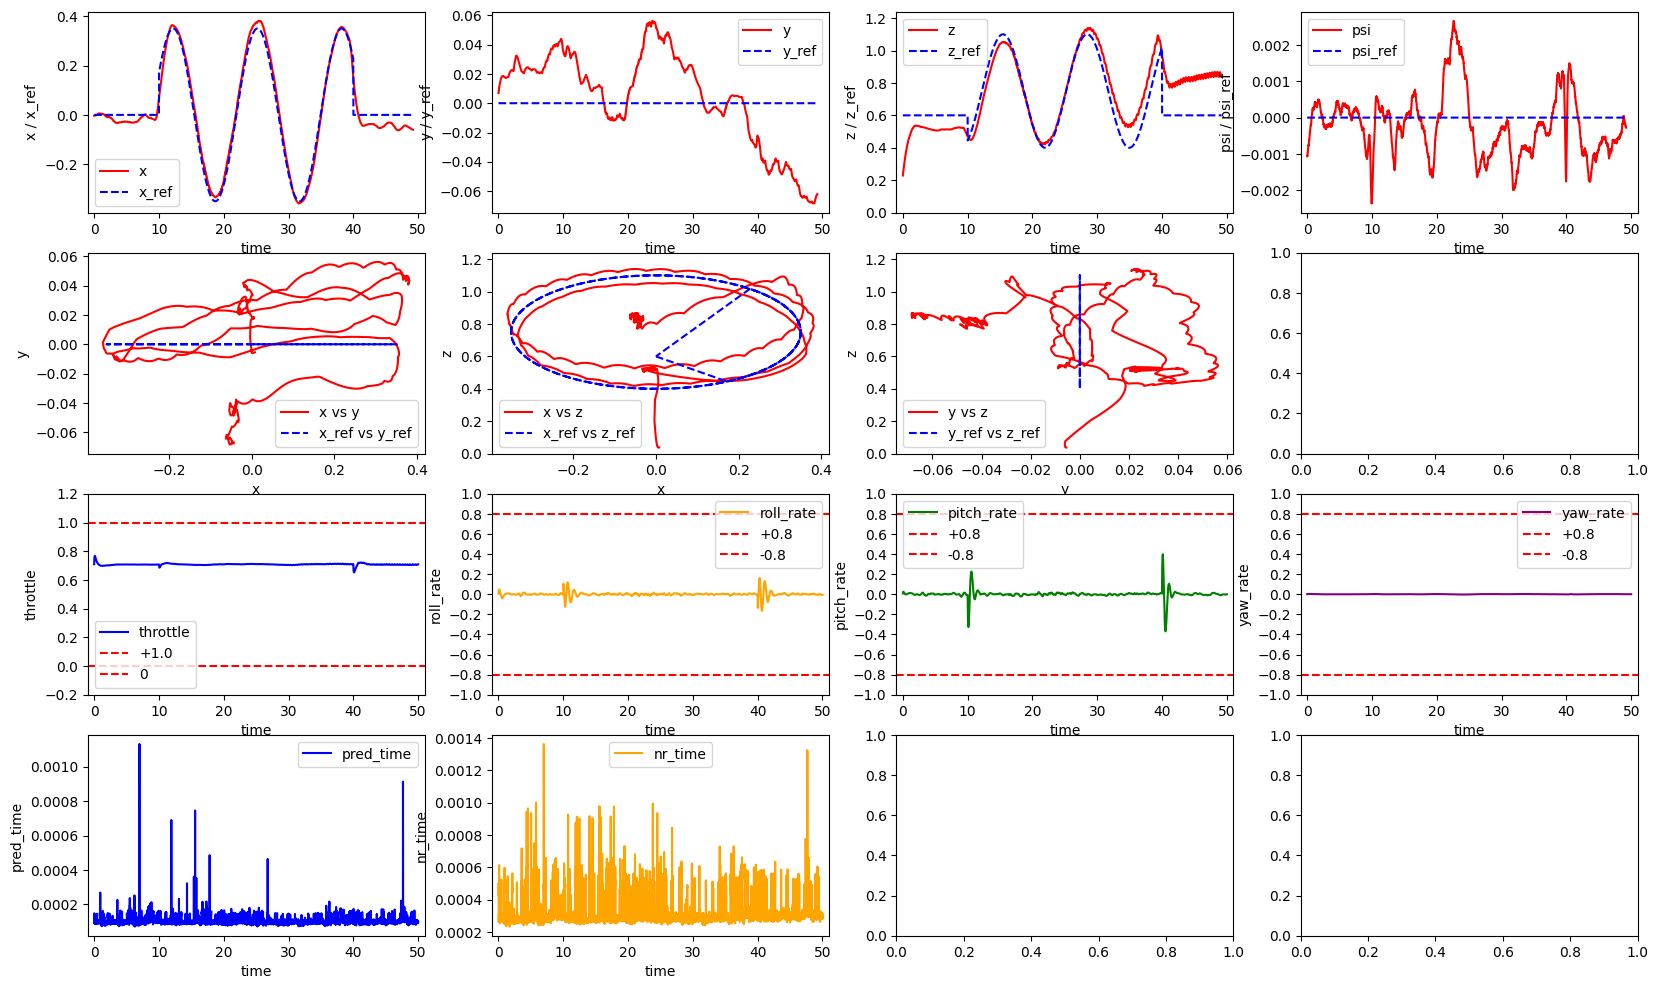

In [4]:
# Reuse the plotting function defined earlier for the uploaded .log data
make_plot(df_log)